In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import os 
import warnings
warnings.filterwarnings("ignore")

# Data Processing
import pandas as pd
import numpy as np 
import json

# Graph
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  

import seaborn as sns
sns.set_style("whitegrid")

# 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

<Figure size 1440x720 with 0 Axes>

In [3]:
cd '/content/drive/MyDrive/GitHub/Stock_and_Forum/Visualization'

/content/drive/MyDrive/GitHub/Stock_and_Forum/Visualization


# 0. 데이터 로드

In [4]:
stock = pd.read_csv('./data/stock.csv')
stock_processed = pd.read_csv('./data/stock_processed.csv')
with open('./data/naverforum1.json') as f:
    forum = json.load(f)
with open('./data/naverforum2.json') as f:
    forum2 = json.load(f)
forum.extend(forum2)

In [5]:
print(stock.shape, stock_processed.shape, len(forum))

(2600, 15) (2600, 25) 210672


In [6]:
print('''KOSDAQ 상위 {0}개 종목에 대한 일별 데이터 수집
수집 기간: {1}~{2}
수집 항목
- stock: {3}
- forum: {4}'''
.format(stock_processed[stock_processed.created == min(stock_processed.created)].shape[0], 
        min(stock_processed.created), max(stock_processed.created),
        list(stock.columns),
        list(forum[0].keys())))

KOSDAQ 상위 50개 종목에 대한 일별 데이터 수집
수집 기간: 2022-02-18~2022-05-06
수집 항목
- stock: ['date', 'code', 'name', 'market_cap', 'price', 'open_price', 'high_price', 'low_price', 'gap', 'gap_ratio', 'trading_volume', 'institutional_volume', 'foreign_volume', 'foreign_ratio', 'forum_url']
- forum: ['_id', 'name', 'code', 'datetime', 'title', 'content', 'id', 'view', 'like', 'unlike', 'reply', 'reply_count']


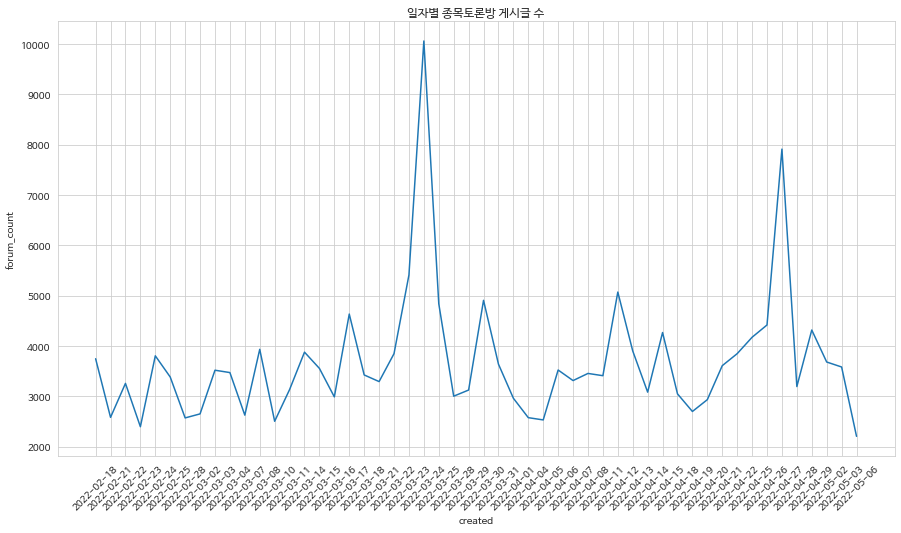

In [18]:
plt.figure(figsize=(15,8))

df_forum_count_per_day = stock_processed.groupby('created').agg({'forum_count':np.sum}).reset_index()

fig = sns.lineplot(x='created', y='forum_count', data=df_forum_count_per_day)
plt.title('일자별 종목토론방 게시글 수')
plt.xticks(rotation=45)
plt.show()